# Wisconsin Breast Cancer data using Logistic regression

Our cost function will be cross-entropy because we are using a dataset that is binary classification (Discrete values for each output). Cross-entropy is generally used for multi-class classification but works just as well for binary class classification. 

In [176]:
# This code will be heavily commented as to improve readability
# perhaps at the cost of efficiency

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import scikitplot as skplt
from sklearn import preprocessing

plt.rcParams['figure.dpi']= 180
plt.rc('font',**{'family':'serif','serif':['Times']}) #Plot text font
plt.rc('text', usetex=False)

# Load the data
cancer = load_breast_cancer()
X,y = cancer.data, cancer.target

# Our binary cross entropy function
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat))- (1-y)*np.log(1-y_hat))
    return loss

# Our "activation function"
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def gradients(X, y, y_hat):
    # y_hat --> hypothesis/predictions.
    # w --> weights.
    # b --> bias.
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m) * np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

"""
#Normalizing the features (n)
def normalize(X):
    m ,n = X.shape  #m is training examples and n is features
    for i in range(n):
        X[:,i] = (X[:,i] - np.mean(X[:,i], axis=0)/np.std(X[:,i], axis = 0))
    return X 
"""

def normalize(X):
    X = preprocessing.normalize(X)
    return X 


X_train, X_test, y_train, y_test = train_test_split(normalize(X),y,random_state=0)
#print(X_train.shape)
#print(X_test.shape)
#print(y_test.shape)


def train(X,y, bs, epochs, lr, lamb):
    # bs --> batch size
    # epochs --> Number of iterations
    # lr --> learning rate

    #m --> no. training examples
    #n --> no. of features

    m,n = X.shape
    
    # w --> weights
    # b --> bias
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y
    y = y.reshape(m,1)

    # Norming inputs
    #x = normalize(X)

    # Init. list to keep losses
    losses = []

    # Training loop 
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w = w - lr*(dw + (lamb * w)) 
            b = b - lr*(db + (lamb * b))
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
    return w, b, losses

def predict(X, w, b):
    x = normalize(X)
    preds = sigmoid(np.dot(X, w) + b)
    
    # To store predictions.
    preds_class = []

    # if pred is >= 0.5 round up to 1, otherwise round down to 0
    preds_class = [1 if i > 0.5 else 0 for i in preds] 
    return np.array(preds_class)


Evaluation of one case study with bs = 50, epochs = 1000, lr = 0.000001


In [177]:
# Training

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
X_train = normalize(X_train)
X_test = normalize(X_test)
w, b, l = train(X_train,y_train, bs = 100,epochs = 5000, lr= 0.001, lamb=0.01)

# Evaluation
def accuracy(y, y_hat):
    accuracy = np.sum(y_test == y_hat) / len(y)
    return accuracy
print(accuracy(y_test, y_hat = predict(X_test, w, b)))


0.6293706293706294


Accuracy as a function of learning rate, batch size and epochs

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


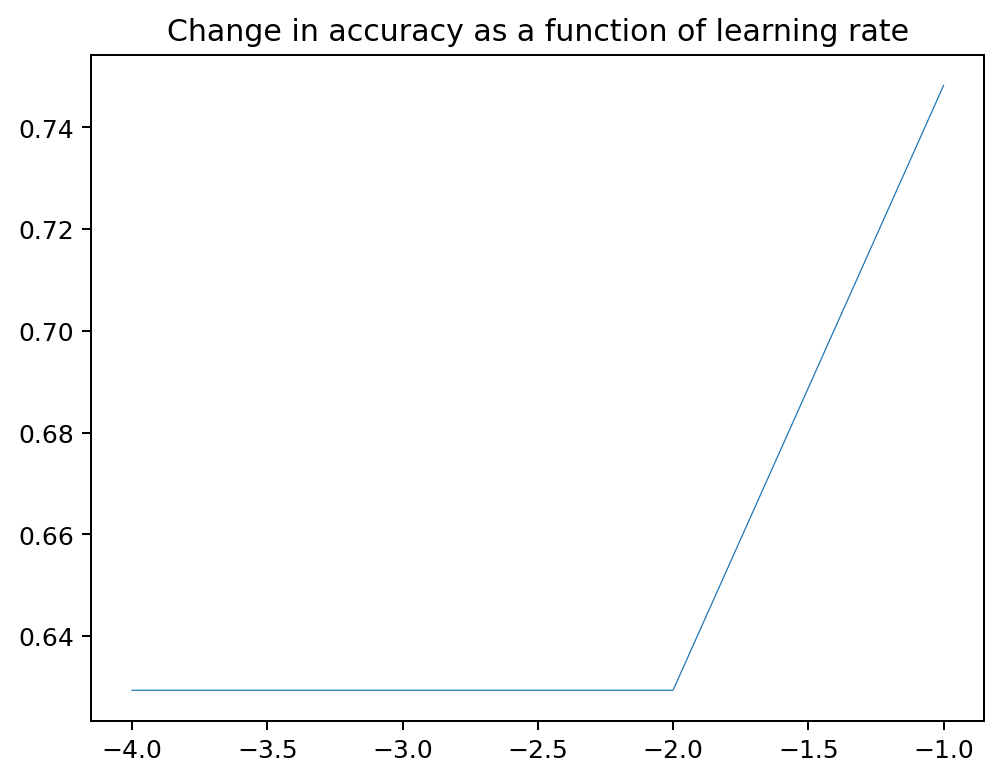

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


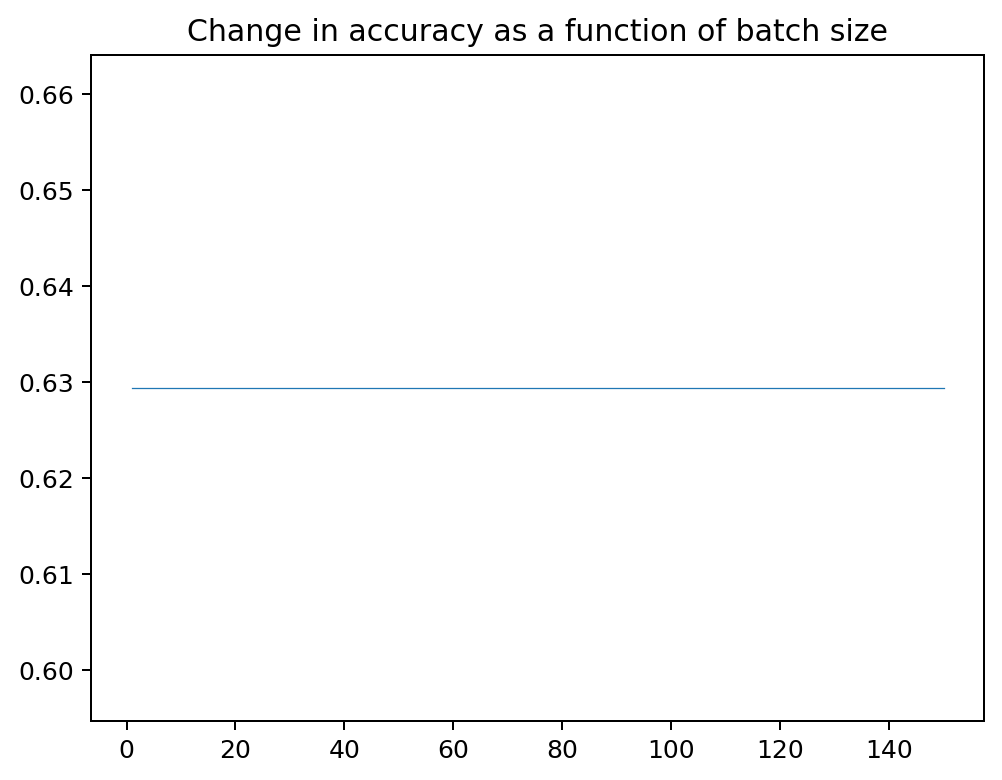

<Figure size 1152x864 with 0 Axes>

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


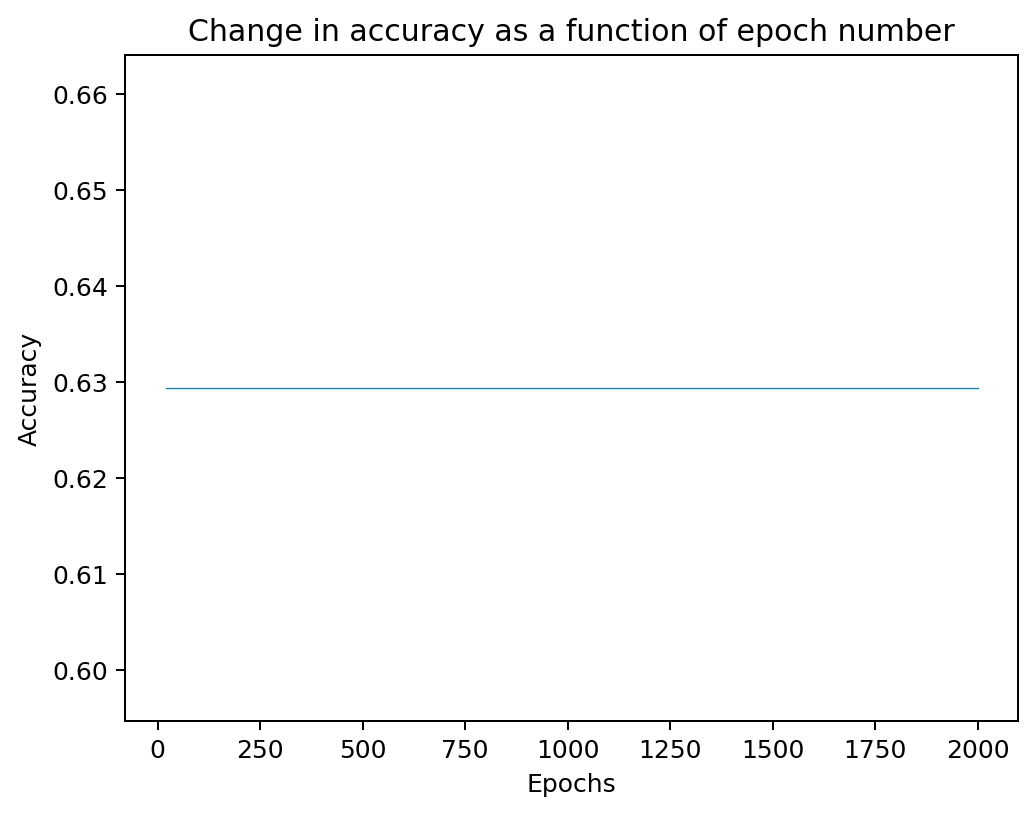

In [178]:

#print(l)
#print(accuracy(y_train, y_hat = predict(X_train, w, b)))

def accuracy_wrt_lr(X,y):
    # X,y --> unsplit dataset
    # In this part we keep bs, epochs constant, but vary learning rate. Choice arbitrary.
    
    lr_array = [1e-1, 1e-2, 1e-3, 1e-4] # 
    bs = 50
    epochs = 500
    lamb = 0.001
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

    X_train = normalize(X_train)
    X_test = normalize(X_test)
    
    acc_lr = np.zeros(len(lr_array))
    
    for i in range(len(lr_array)):
        w, b, _= train(X_train,y_train, bs, epochs, lr_array[i], lamb) 
        y_hat  = predict(X_test, w, b)   # y_hat --> our predictions based on dataset y 
        acc_lr[i] = accuracy(y_test, y_hat)
    
    return acc_lr

def accuracy_wrt_bs(X, y):
    # _____________________
    # In this part we keep epochs and learning rate constant but vary bs
    # _____________________
    
    lr = 0.00001 #arbr. choice
    bs_array = np.linspace(1, 101, 5)
    epochs = 500  #arbr. choice 
    lamb = 0.001

    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

    X_train = normalize(X_train)
    X_test = normalize(X_test)

    acc_bs = np.zeros(len(bs_array))
    
    for i in range(len(bs_array)):
        w, b, _= train(X_train,y_train, int(bs_array[i]), epochs, lr, lamb) 
        y_hat  = predict(X_test, w, b)   # y_hat --> our predictions based on dataset y 
        acc_bs[i] = accuracy(y_test, y_hat)
    
    return acc_bs

def accuracy_wrt_epochs(X, y):
    # _____________________
    # In this part we keep bs and learning rate constant but vary epochs
    # _____________________
    
    lr = 0.0001
    bs = 50
    epochs_array = np.linspace(20,2000, 100)
    lamb = 0.001
    
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

    X_train = normalize(X_train)
    X_test = normalize(X_test)

    acc_epochs = np.zeros(len(epochs_array))

    for i in range(len(epochs_array)):
        w, b, _= train(X_train,y_train, bs, int(epochs_array[i]), lr, lamb) 
        y_hat  = predict(X_test, w, b)   # y_hat --> our predictions based on dataset y 
        acc_epochs[i] = accuracy(y_test, y_hat)

    return acc_epochs
acc_lr = accuracy_wrt_lr(X,y)
acc_bs = accuracy_wrt_bs(X, y)
acc_epochs = accuracy_wrt_epochs(X, y)

lr_array = [1e-1, 1e-2, 1e-3, 1e-4] # 
plt.figure(0)
plt.plot(np.log10(lr_array), acc_lr, lw = "0.5")
plt.savefig("delta_acc_lr.png", dpi = 300)
plt.title("Change in accuracy as a function of learning rate")
plt.show()

bs_array = np.linspace(1, 101, 5)
plt.figure(1)
plt.plot(bs_array, acc_bs, lw = "0.5")
plt.title("Change in accuracy as a function of batch size")
plt.show()
plt.savefig("delta_acc_bs.png", dpi = 300)
plt.show()

epochs_array = np.linspace(20,2000, 100)
plt.figure(2)
plt.plot(epochs_array, acc_epochs, lw = "0.5")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.title("Change in accuracy as a function of epoch number")
plt.savefig("delta_acc_epochs.png", dpi = 300)
plt.show()


This can be used as a benchmark to evaluate our model.

Test set accuracy with Logistic Regression: 0.76
Test set accuracy Logistic Regression with scaled data: 0.97
[1.         0.93333333 0.93333333 1.         1.         0.92857143
 1.         1.         0.85714286 1.        ]
Test set accuracy with Logistic Regression and scaled data: 0.97


findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


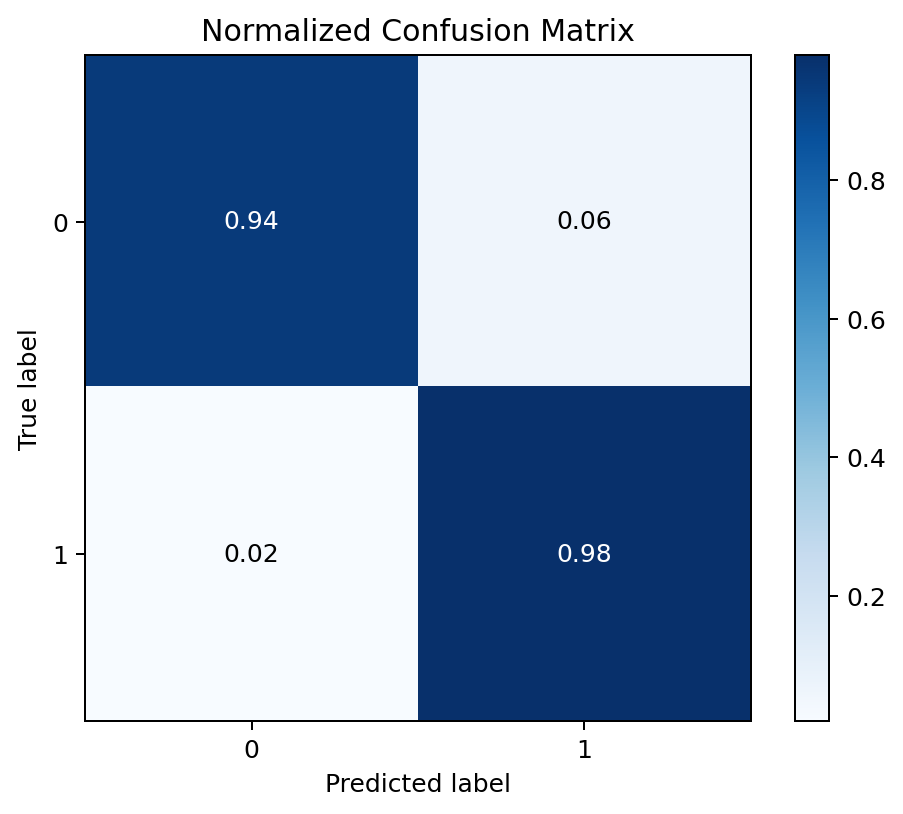

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


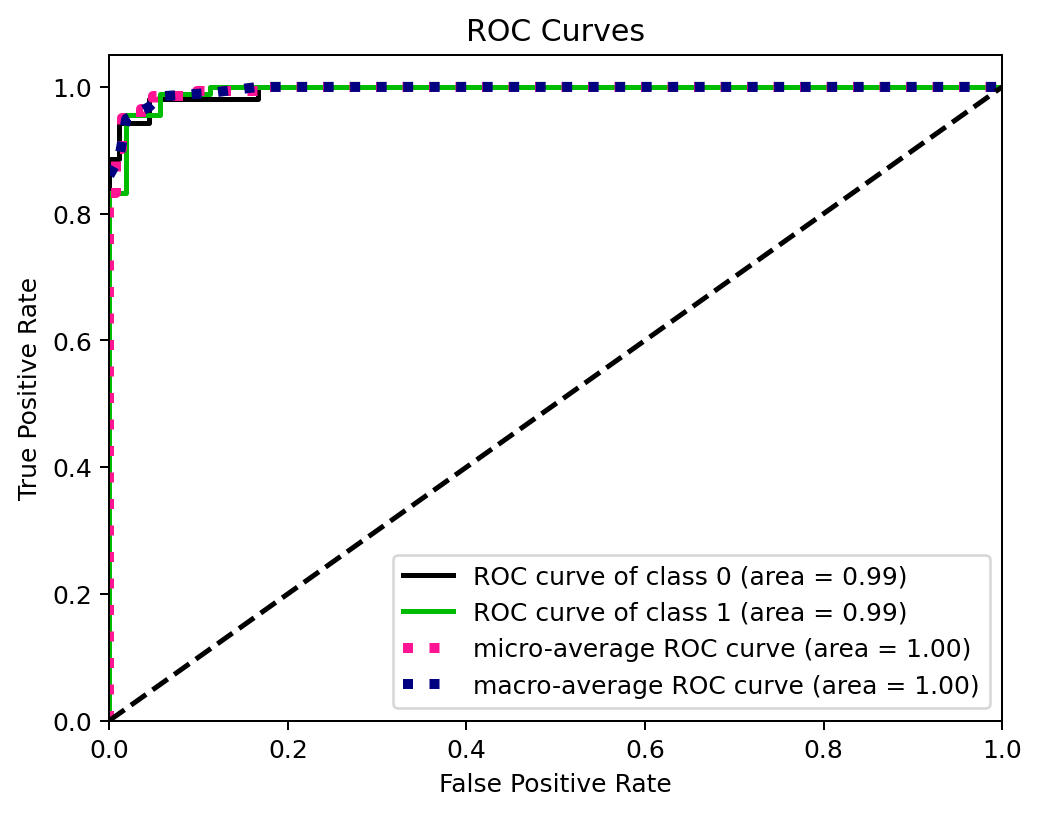

findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times
findfont: Generic family 'serif' not found because none of the following families were found: Times


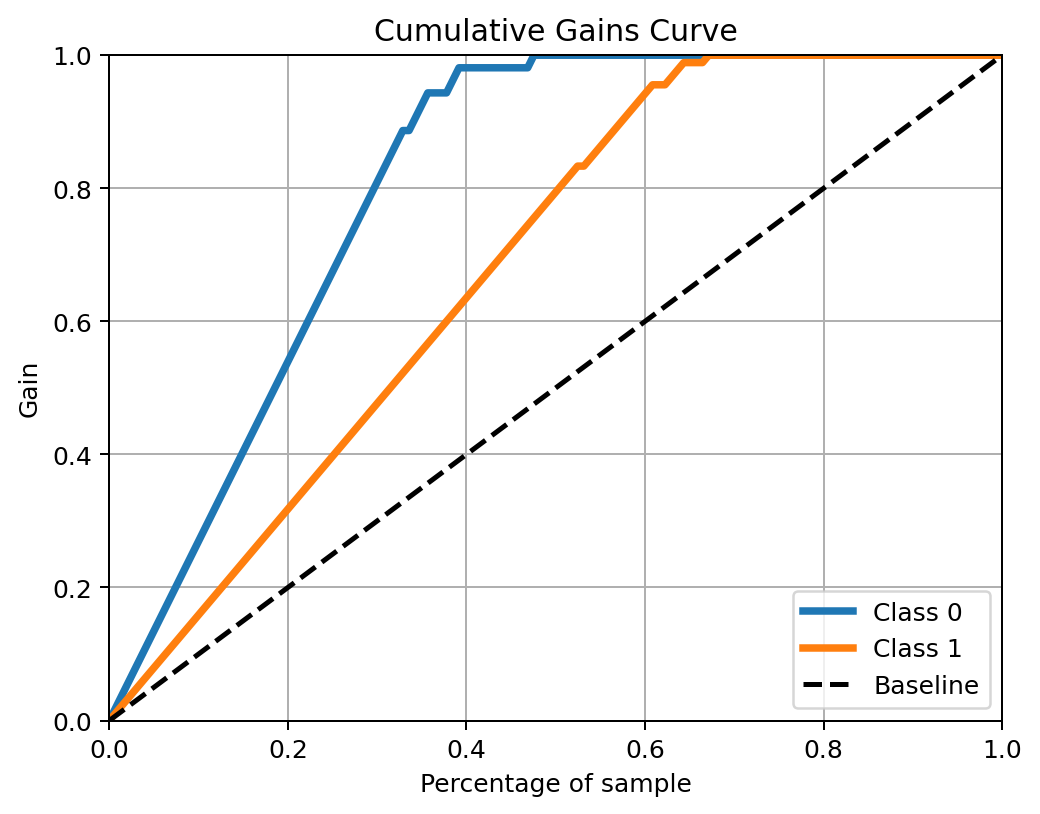

In [179]:
# Logistic Regression
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)  #Use as a benchmark
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
#now scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
#Cross validation
accuracy = cross_validate(logreg,X_test_scaled,y_test,cv=10)['test_score']
print(accuracy)
print("Test set accuracy with Logistic Regression and scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))

# NN wiht no hidden layers is the same as logistic regression

y_pred = logreg.predict(X_test_scaled)
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()
y_probas = logreg.predict_proba(X_test_scaled)
skplt.metrics.plot_roc(y_test, y_probas)
plt.show()
skplt.metrics.plot_cumulative_gain(y_test, y_probas)
plt.show()